# Acerca del proyecto

El objetivo del proyecto es categorizar países utilizando factores socioeconómicos y de salud que determinen el desarrollo general del país. HELP International, una ONG humanitaria internacional, ha recaudado $10 millones y necesita decidir estratégicamente cómo utilizar esos fondos. Como científico de datos, tu tarea es categorizar los países según los factores determinantes y sugerir en qué países debe enfocarse el CEO para brindar ayuda.

## Acerca del dataset

The main dataset containing 167 rows and 10 columns

1. **country:** Name of the country
2. **child_mort:** Death of children under 5 years of age per 1000 live births
3. **exports:** Exports of goods and services per capita. Given as %age of the GDP per capita
4. **health:** Total health spending per capita. Given as %age of GDP per capita
5. **imports:** Imports of goods and services per capita. Given as %age of the GDP per capita
6. **income:** Net income per person
7. **inflation:** The measurement of the annual growth rate of the Total GDP
8. **life_expec:** The average number of years a new born child would live if the current mortality patterns are to remain the same
9. **total_fer:** The number of children that would be born to each woman if the current age-fertility rates remain the same.
10. **gdpp:** The GDP per capita. Calculated as the Total GDP divided by the total population.

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', context='notebook', palette='muted')

## Carga de datos

In [192]:
df = pd.read_csv('../data/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [193]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Manejando valores nulos

In [194]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Valores duplicado 

In [195]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Análisis de distribucion

In [196]:
# Analisis de outlier en numericos
int_cols = df.select_dtypes(exclude='object').columns

for i, cols in enumerate(int_cols):
    print(cols)

child_mort
exports
health
imports
income
inflation
life_expec
total_fer
gdpp


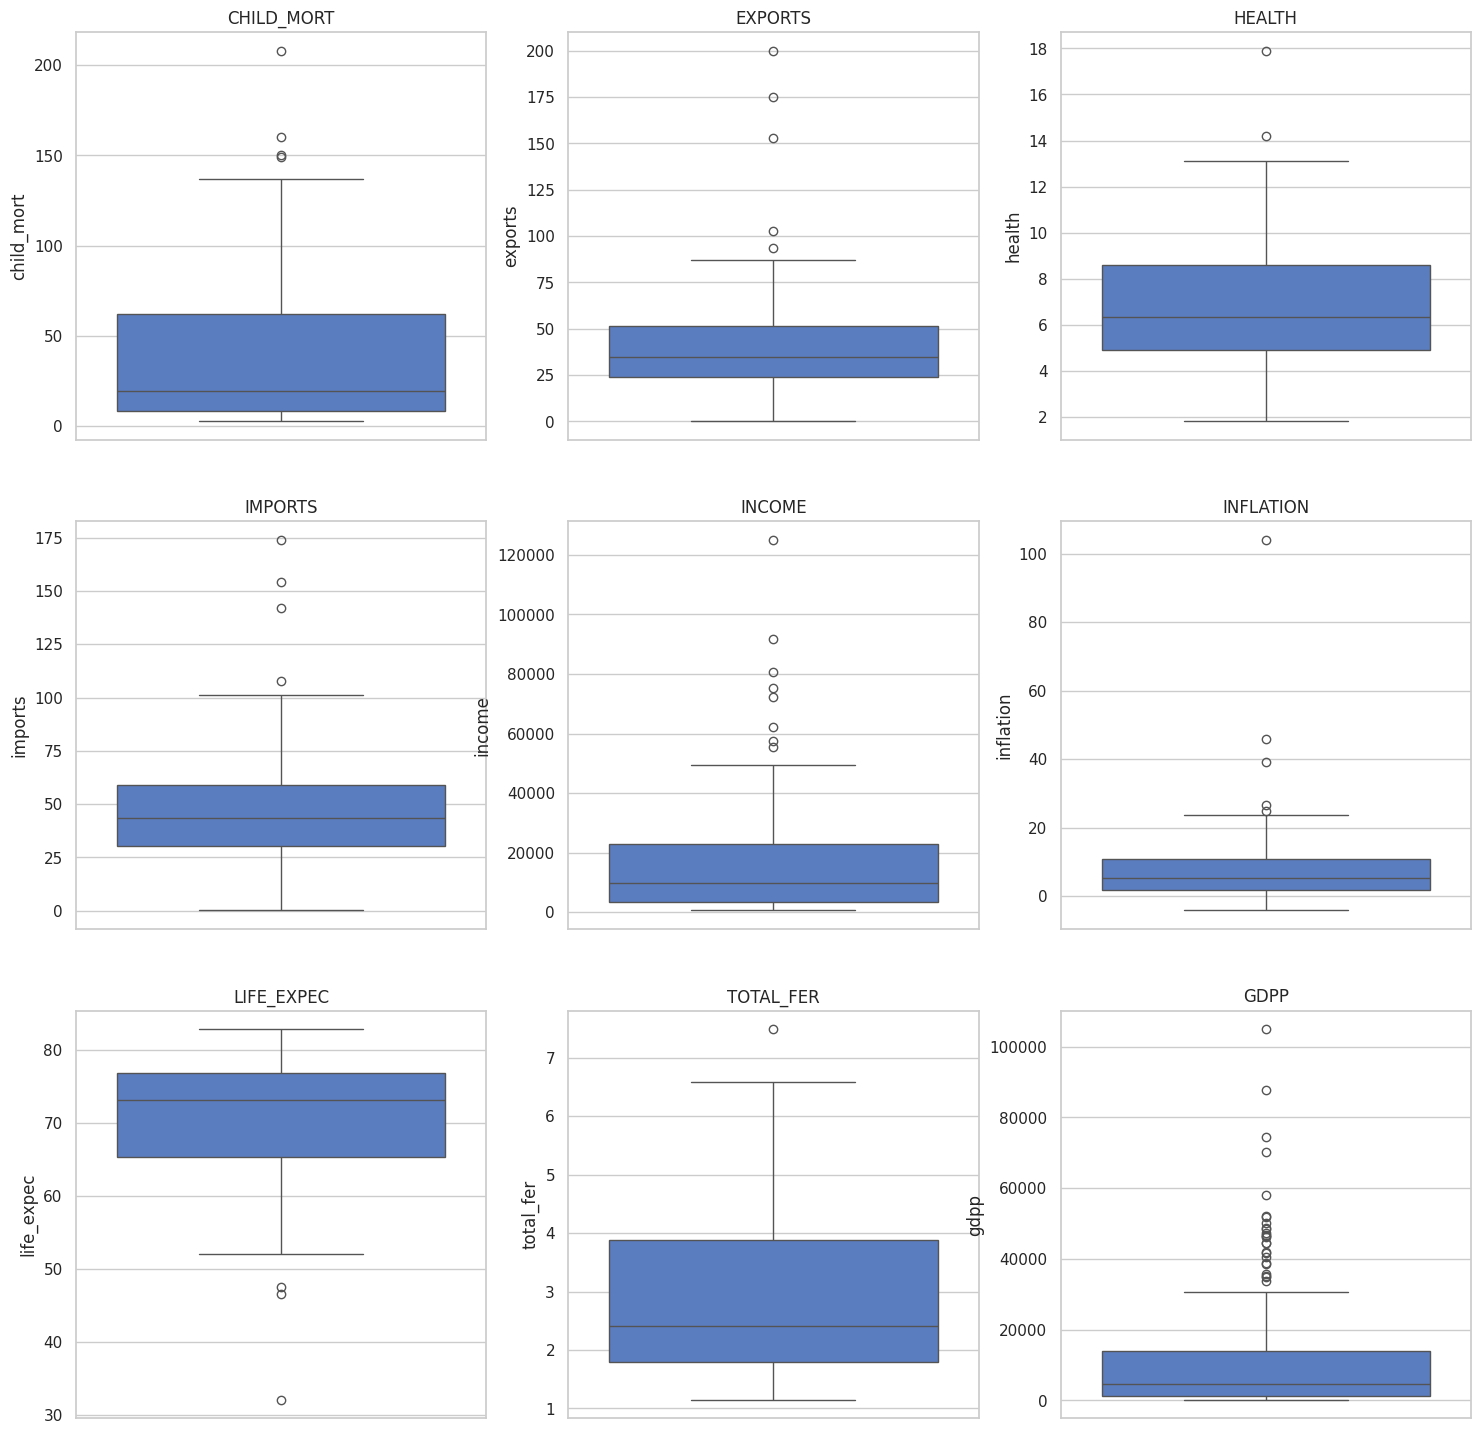

In [197]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
for i, cols in enumerate(int_cols):
    fila = i // 3 # Calcular la fila correspondiente
    columna = i % 3 # Calcular la columna correspondiente

    sns.boxplot(data=df, y=cols, ax=axs[fila, columna])
    axs[fila, columna].set_title(f"{cols.upper()}")
plt.show()

### Insights
Durante el análisis de las distribuciones mediante boxplots de las variables en el dataset "Unsupervised Learning on Country Data", se descubrieron los siguientes insights:

• Se identificaron varios outliers en las distribuciones de las variables.

• Específicamente, se destacó un outlier en la variable de inflación.

• A pesar de la presencia de outliers, se decidió no eliminarlos en este caso.

• Los outliers en la variable de inflación son parte de los datos económicos de cada país y no pueden ser descartados.

• Estos datos representan aspectos fundamentales de la economía y no surgieron de la nada.

• La decisión de no eliminar los outliers resalta la importancia de comprender y analizar adecuadamente el contexto y la naturaleza de los datos antes de realizar cualquier modificación.

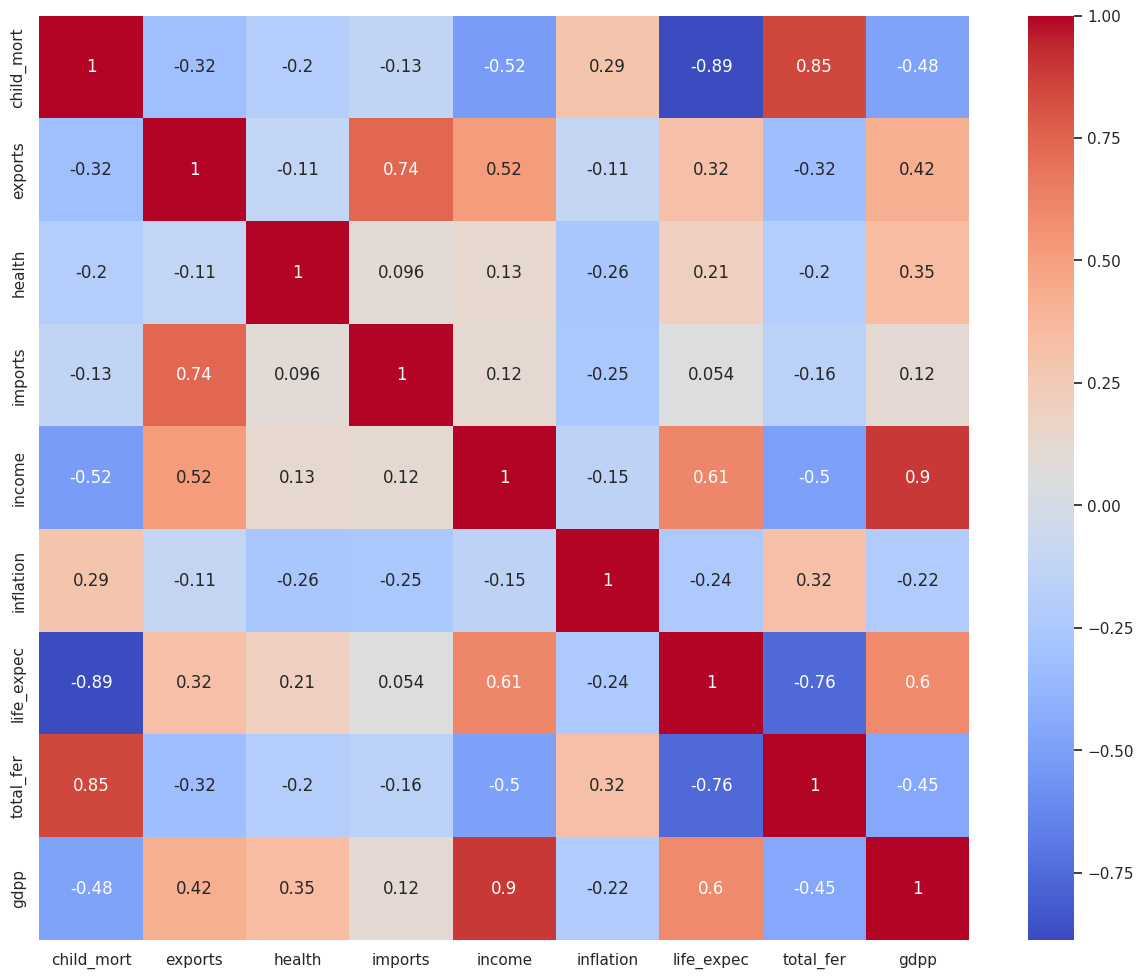

In [198]:
plt.figure(figsize=(15,12))

sns.heatmap(
    df.select_dtypes(exclude='object').corr(),
    annot=True,
    cmap='coolwarm');

### Insights
- Existe una alta correlación positiva de 0.90 entre el ingreso per cápita (income) y el producto interno bruto per cápita (gdpp).

- Se observa una alta correlación negativa de -0.89 entre la esperanza de vida (life_expec) y la tasa de mortalidad infantil (child_mort).

- Se encontró una alta correlación positiva de 0.85 entre la tasa de mortalidad infantil (child_mort) y la fertilidad total (total_fer).

- Se observa una alta correlación negativa de -0.76 entre la esperanza de vida (life_expec) y la fertilidad total (total_fer).

- Existe una correlación moderada de 0.61 entre el ingreso per cápita (income) y la esperanza de vida (life_expec).
- Se encontró una correlación moderada de 0.60 entre el producto interno bruto per cápita (gdpp) y la esperanza de vida (life_expec).

- Existe una alta correlación positiva de 0.74 entre las exportaciones (exports) e importaciones (imports).

## Conclusiones:

- La correlación positiva entre el ingreso per cápita (income) y el producto interno bruto per cápita (gdpp) respalda la idea de que un mayor ingreso económico está asociado con un mayor desarrollo económico.

- La alta correlación negativa entre la esperanza de vida (life_expec) y la tasa de mortalidad infantil (child_mort) sugiere que los países con mejores condiciones de salud tienen una menor tasa de mortalidad infantil.

- La correlación positiva entre la tasa de mortalidad infantil (child_mort) y la fertilidad total (total_fer) indica que los países con altas tasas de fertilidad total pueden enfrentar desafíos en la salud y el bienestar infantil.

- La alta correlación negativa entre la esperanza de vida (life_expec) y la fertilidad total (total_fer) sugiere que una menor fertilidad total puede estar relacionada con una mayor atención médica y una mejor calidad de vida.

- Las correlaciones moderadas entre el ingreso per cápita (income) y la esperanza de vida (life_expec), así como entre el producto interno bruto per cápita (gdpp) y la esperanza de vida (life_expec), indican que un mayor nivel de desarrollo económico puede estar asociado con una mayor esperanza de vida.

- La alta correlación positiva entre las exportaciones (exports) e importaciones (imports) indica la interdependencia y el flujo de bienes en el comercio internacional.

## Escalar datos

Escalar los datos antes del PCA mejora su rendimiento y precisión al igualar las magnitudes de las variables, lo que garantiza una contribución equitativa y una mejor captura de las variaciones relevantes.

In [199]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.drop('country', axis=1))

In [200]:
df_scaled = pd.DataFrame(df_scaled, columns=df.drop('country', axis=1).columns)

In [201]:
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

In [202]:
from sklearn.decomposition import PCA

In [203]:
pca = PCA()
pca.fit(df_scaled)
pca_data_scaled = pca.transform(df_scaled)
pd.DataFrame(pca_data_scaled)

,0,1,2,3,4,5,6,7,8
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049


In [204]:
# Calcular la varianza explicada por cada componente principal
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


In [205]:
# Cacluclar la varianza acumula en porcentaje
cum_var = np.cumsum(np.round(var, decimals=4) * 100)

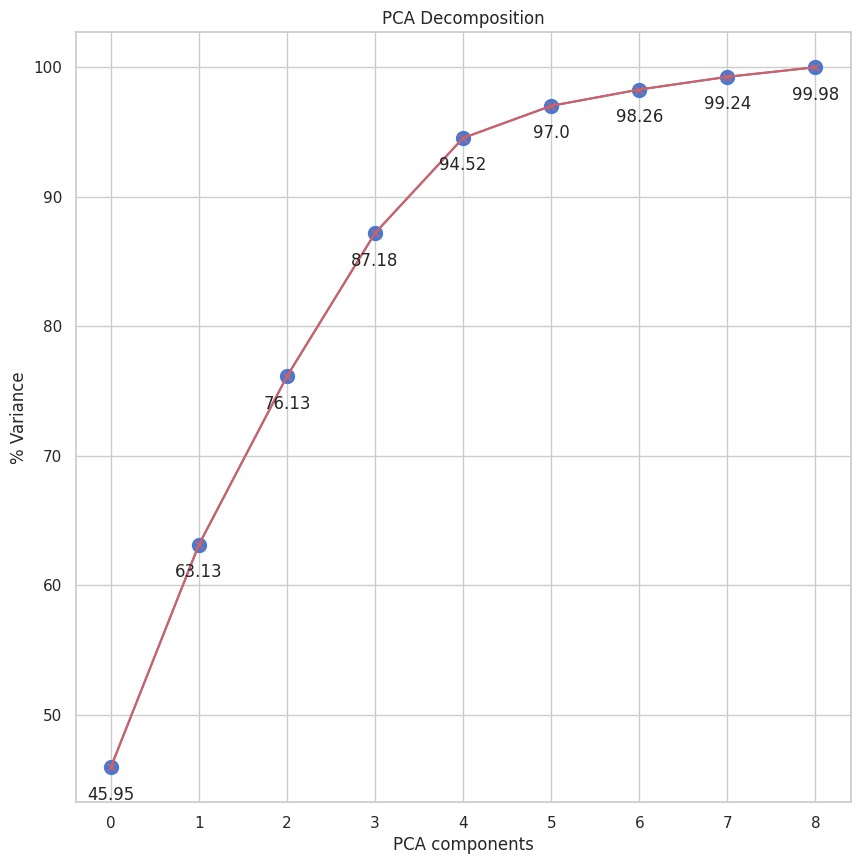

In [206]:
components = list(range(0, 9))

plt.figure(figsize=(10, 10))
# Crear una grafica para visualizar la varianza acumulada y marcar los puntos con estrellas rojas
plt.plot(cum_var, marker='o', markersize=10, color='b')

# Etiquetar el valor de la varianza acumulada en los puntos correspondientes
for s, d in zip(components, cum_var):
    plt.annotate(np.round(d, decimals=2), xy=(s, d - 2.5), ha='center')

plt.plot(components, cum_var, 'r-x')
plt.title("PCA Decomposition")
plt.xlabel("PCA components")
plt.ylabel("% Variance")
plt.show()

Al observar el gráfico, vemos que al seleccionar 4 variables del PCA, capturamos un 87.2% de la información total. Esta elección nos permitira simplificar el análisis sin perder información esencial.

In [207]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8], axis=1, inplace=True)

In [208]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


## Importar librería para clustering

In [209]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from typing import List

## K-means

In [210]:
K = list(range(2, 15))
K

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [211]:
def analyze_cluster(K:List, data:pd.DataFrame):
    Sum_squared_distances = []
    silhouette_s = []
    for _ in K:
        km = KMeans(n_clusters=_, n_init='auto', random_state=42)
        y = km.fit_predict(data)
        Sum_squared_distances.append(km.inertia_)
        silhouette_s.append(silhouette_score(data, y))
    return Sum_squared_distances, silhouette_s

In [212]:
elbow, silhouette_s = analyze_cluster(K, pca_data_standard)

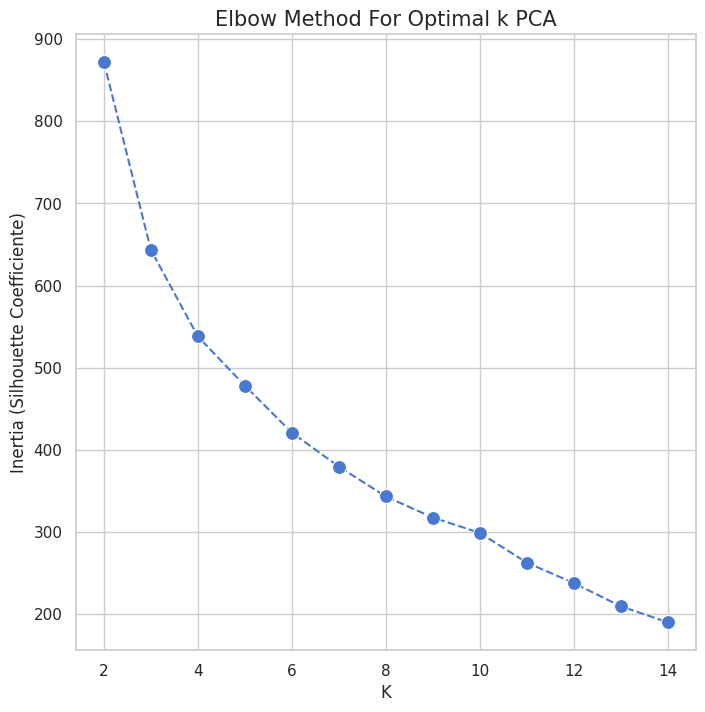

In [213]:
fig = plt.figure(figsize=(8, 8))
sns.lineplot(x=K, y=elbow, linestyle='dashed', marker='o', markersize=10, color='b')
plt.xlabel("K")
plt.ylabel('Inertia (Silhouette Coefficiente)')
plt.title("Elbow Method For Optimal k PCA", size=15)
plt.show()

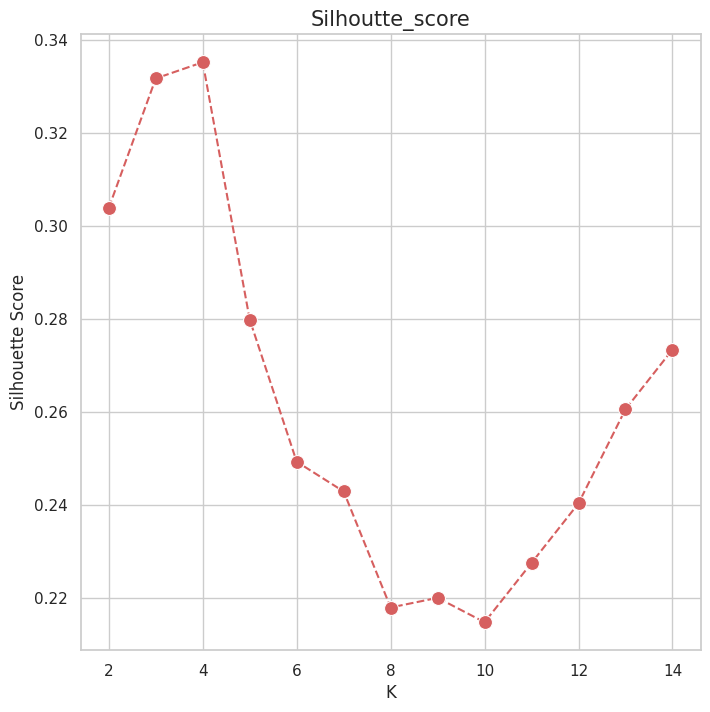

In [214]:
fig = plt.figure(figsize=(8, 8))
sns.lineplot(x=K, y=silhouette_s, linestyle='dashed', marker='o', markersize=10, color='r')
plt.xlabel("K")
plt.ylabel('Silhouette Score')
plt.title("Silhoutte_score", size=15)
plt.show()

In [215]:
# Con la version optima
km = KMeans(n_clusters=4, n_init='auto', random_state=42)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df['K_means_PCA'] = y

0.3352960060223145


## SIN PCA

In [216]:
elbow, silhouette_s = analyze_cluster(K, df_scaled)

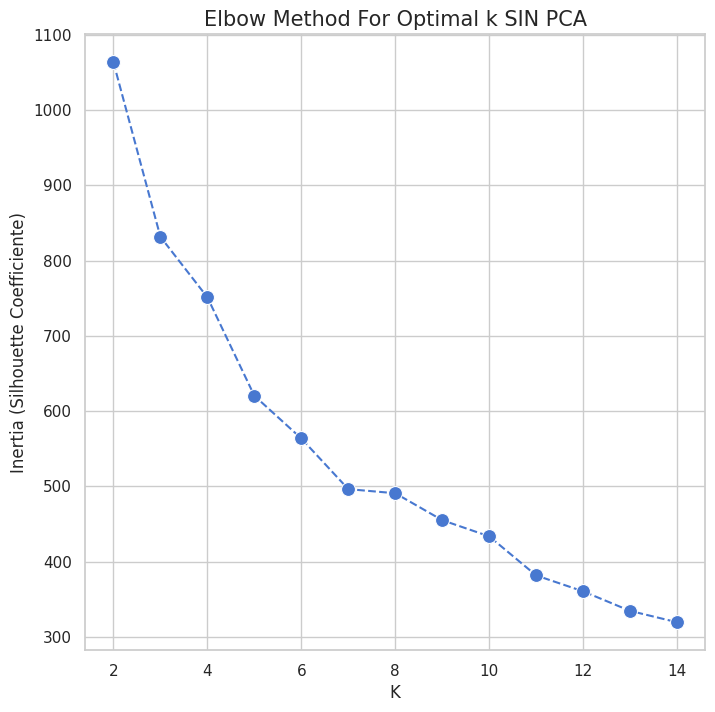

In [217]:
fig = plt.figure(figsize=(8, 8))
sns.lineplot(x=K, y=elbow, linestyle='dashed', marker='o', markersize=10, color='b')
plt.xlabel("K")
plt.ylabel('Inertia (Silhouette Coefficiente)')
plt.title("Elbow Method For Optimal k SIN PCA", size=15)
plt.show()

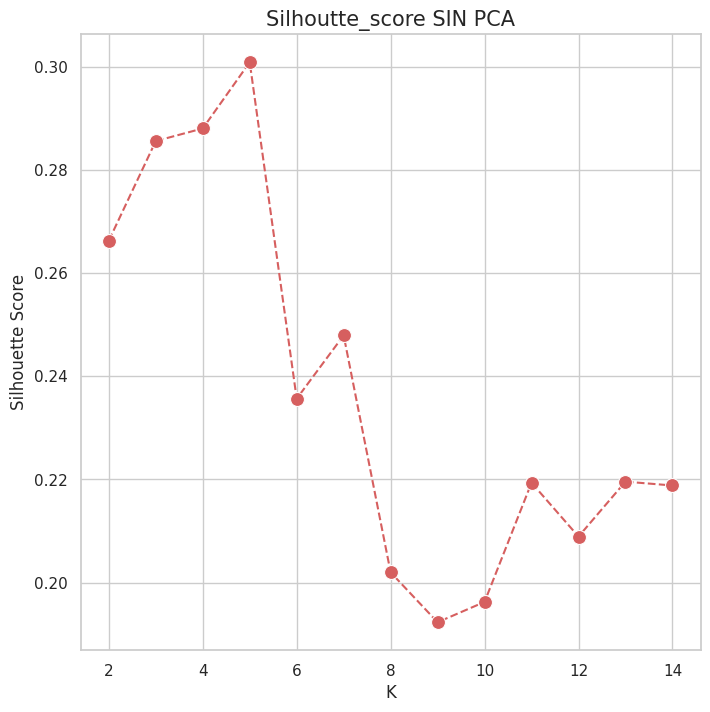

In [218]:
fig = plt.figure(figsize=(8, 8))
sns.lineplot(x=K, y=silhouette_s, linestyle='dashed', marker='o', markersize=10, color='r')
plt.xlabel("K")
plt.ylabel('Silhouette Score')
plt.title("Silhoutte_score SIN PCA", size=15)
plt.show()

In [219]:
# Con la version optima
km = KMeans(n_clusters=5, n_init='auto', random_state=42)
y = km.fit_predict(df_scaled)
print(silhouette_score(df_scaled, y))
df['K_means'] = y

0.30088229124112015


Al analizar los resultados de los gráficos de silueta con el método WCSS en PCA y sin PCA, se observó que el codo se encontraba entre 4 y 6 clusters. Sin embargo, el análisis de coeficiente de silueta reveló que se obtenía el porcentaje más alto cuando se utilizaban 4 clusters.

## Hierarchical Clustering

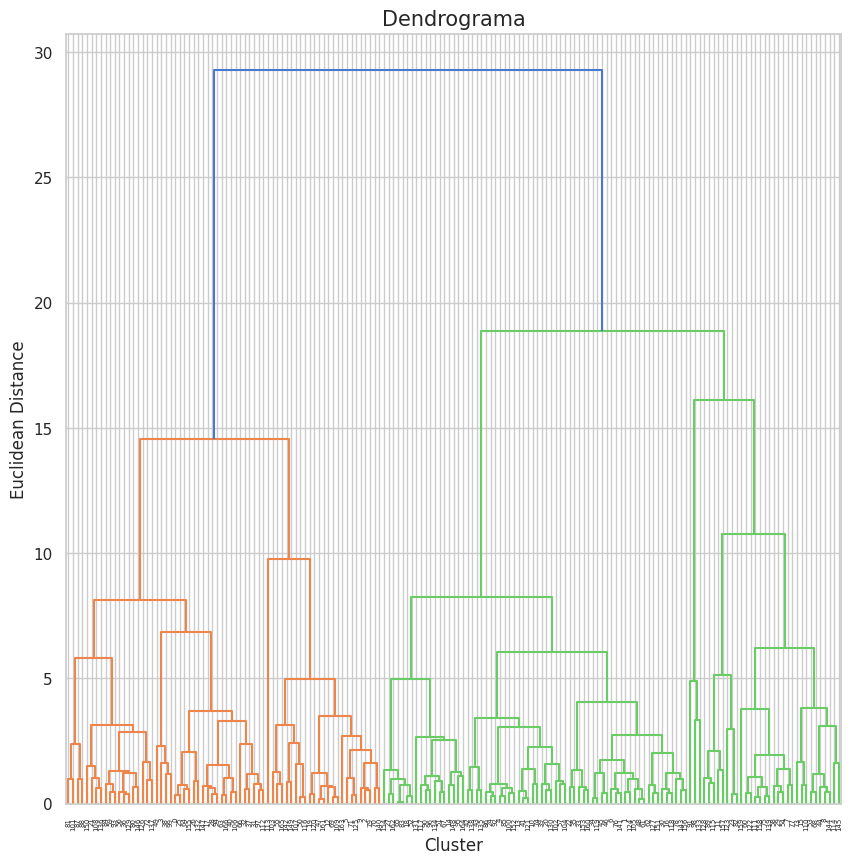

In [220]:
fig = plt.figure(figsize=(10, 10))

dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.xlabel("Cluster")
plt.ylabel('Euclidean Distance')
plt.title("Dendrograma", size=15)
plt.show()

### PCA


In [221]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)

print("Silhouette Score: ", silhouette_score(pca_data_standard, y_hc))

df['hc_pca'] = y_hc

Silhouette Score:  0.3070110704080526


## SIN PCA

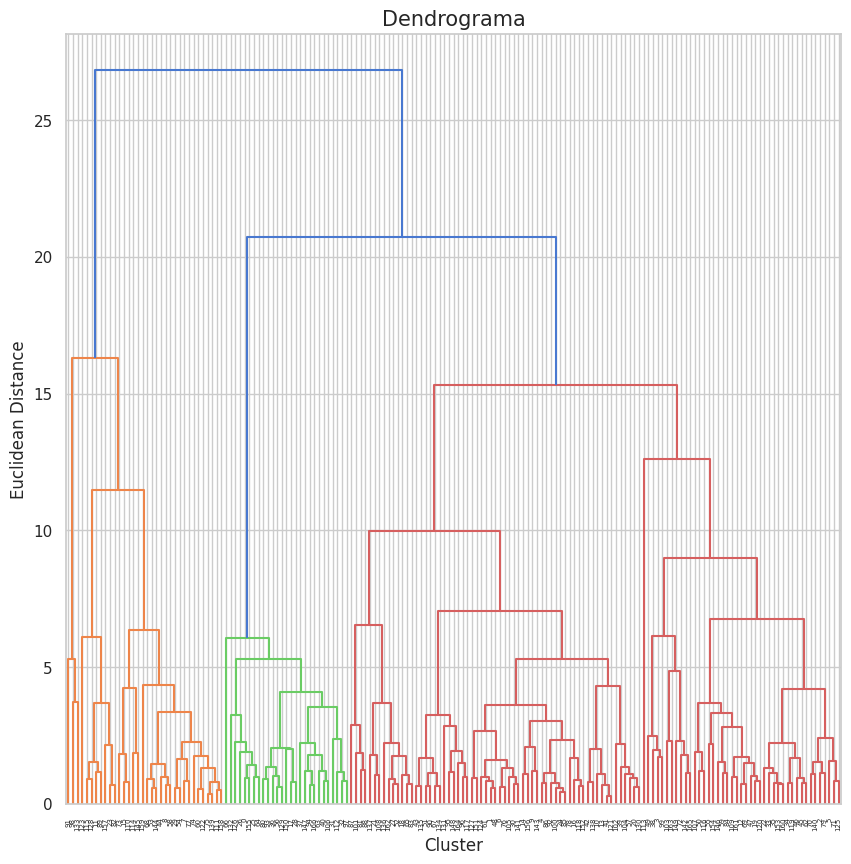

In [222]:
fig = plt.figure(figsize=(10, 10))

dendrogram_plot = dendrogram(linkage(df_scaled, method='ward'))
plt.xlabel("Cluster")
plt.ylabel('Euclidean Distance')
plt.title("Dendrograma", size=15)
plt.show()

In [225]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)

print("Silhouette Score: ", silhouette_score(df_scaled, y_hc))

df['hc'] = y_hc

Silhouette Score:  0.3153134331018189


## DBSCAN

PCA

In [226]:
from sklearn.neighbors import NearestNeighbors

# Crear una instancia del modelo NearestNeighbors con n_neighbors=2
neighbors =  NearestNeighbors(n_neighbors=2)

# Ajustar el modelo NearestNeighbors utilizando los datos transformados mediante PCA
neighbors_fit = neighbors.fit(pca_data_standard)

# Calcular las distancias y los índices de los vecinos más cercanos
distances, indeces = neighbors_fit.kneighbors(pca_data_standard)

In [227]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

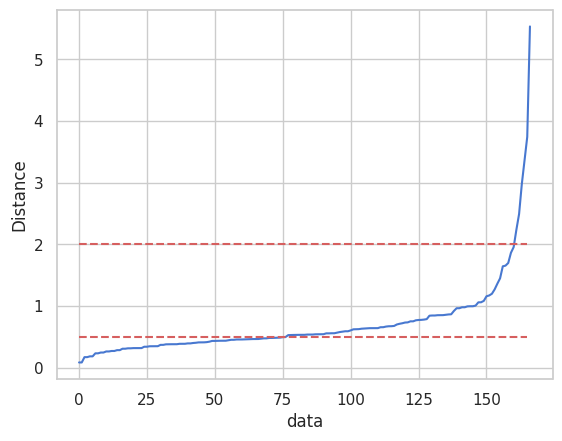

In [228]:
plt.plot(distances)

plt.xlabel('data')
plt.ylabel('Distance')

plt.hlines(y=2 ,xmin=0,xmax=165, linestyles="dashed", colors='r')
plt.hlines(y=0.5 ,xmin=0,xmax=165, linestyles="dashed", colors='r')

Exploramos el rango de 0.5 a 2 en el gráfico de rodilla para encontrar el mejor valor de epsilon. Este valor óptimo nos permite identificar cambios importantes en las distancias y optimizar el algoritmo de clustering con DBSCAN.

In [230]:
# Crear un arreglo de valores de epsilon desde 0.5 hasta 2 con paso de 0.1

eps_values = np.arange(0.5, 2, 0.1)

# Crear un arreglo de valores de min_samples desde 3 hasta 12

min_samples = np.arange(3, 12)

In [231]:
from itertools import product

# Generar todas las combinaciones posibles entre los valores de eps_values y min_samples
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_scores = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_scores.append(silhouette_score(pca_data_standard, y_dbscan))
    except:
        sil_scores.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [232]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_samples'])
df_params_tunning['sil_scores'] = sil_scores
df_params_tunning['n_clusters'] = no_of_clusters

In [233]:
df_params_tunning

,Eps,Min_samples,sil_scores,n_clusters
0,0.5,3,-0.290614,8
1,0.5,4,-0.346912,8
2,0.5,5,-0.270847,3
3,0.5,6,-0.270847,3
4,0.5,7,-0.192021,2
...,...,...,...,...
130,1.9,7,0.508155,2
131,1.9,8,0.508155,2
132,1.9,9,0.508155,2
133,1.9,10,0.490310,2


In [234]:
pivot_1 = pd.pivot_table(df_params_tunning, values='sil_scores', columns='Eps', index='Min_samples')


pivot_2 = pd.pivot_table(df_params_tunning, values='n_clusters', columns='Eps', index='Min_samples')

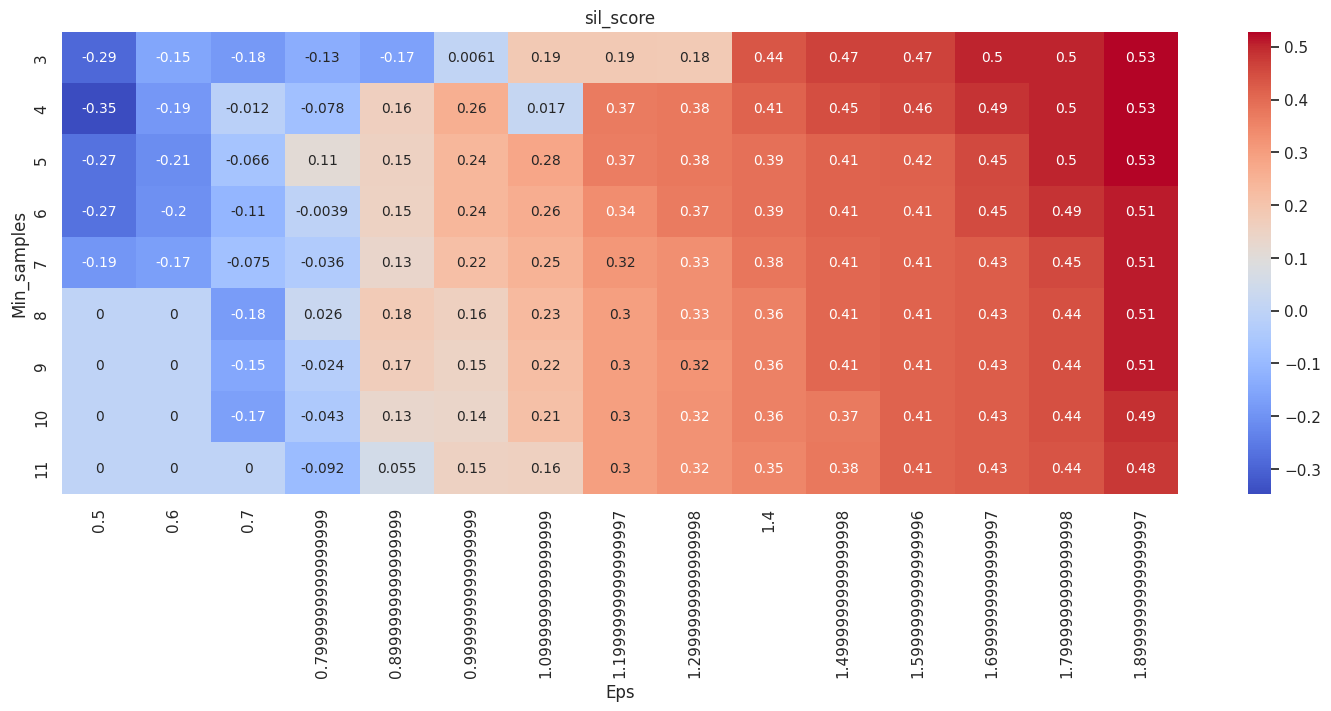

In [239]:
plt.figure(figsize=(18,6))
sns.heatmap(pivot_1,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('sil_score')
plt.show()

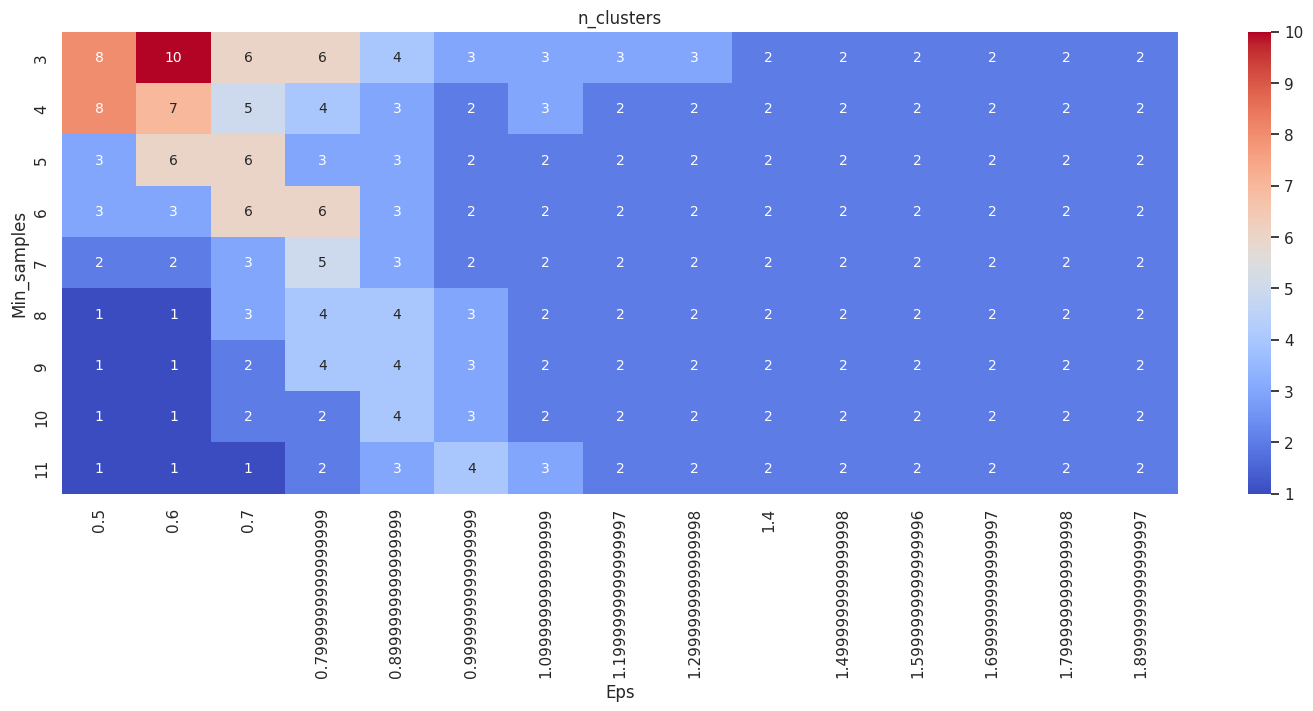

In [238]:
plt.figure(figsize=(18,6))
sns.heatmap(pivot_2,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('n_clusters')
plt.show()

En el análisis de los gráficos:

- El gráfico de sil_score indica que un Eps de 1.89 tiene un alto índice de silueta, lo que sugiere buena calidad de los clusters.

- Sin embargo, el gráfico de n_clusters muestra que el número de clusters es bajo, posiblemente con solo 1 cluster y outliers.

- Esta discrepancia indica que la configuración con Eps de 1.89 no sería útil para la predicción, a pesar del alto índice de silueta.

- Por otro lado, con un Eps de 1.19, se obtiene un índice de silueta de 0.18 y se observan 3 clusters en el gráfico de n_clusters.

- Esta configuración parece más adecuada, con un número razonable de clusters y un índice de silueta aceptable.

In [240]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print("Silhouette Score: ", silhouette_score(pca_data_standard, y_dbscan))
df['dbscan_pca'] = y_dbscan

Silhouette Score:  0.18591175730784343


## Sin PCA

In [241]:
from sklearn.neighbors import NearestNeighbors
# Crear una instancia del modelo NearestNeighbors con n_neighbors=2
neighbors = NearestNeighbors(n_neighbors=2)

# Ajustar el modelo NearestNeighbors utilizando los datos transformados mediante PCA
neighbors_fit = neighbors.fit(df_scaled)

# Calcular las distancias y los índices de los vecinos más cercanos
distances, indices = neighbors_fit.kneighbors(df_scaled)

In [242]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

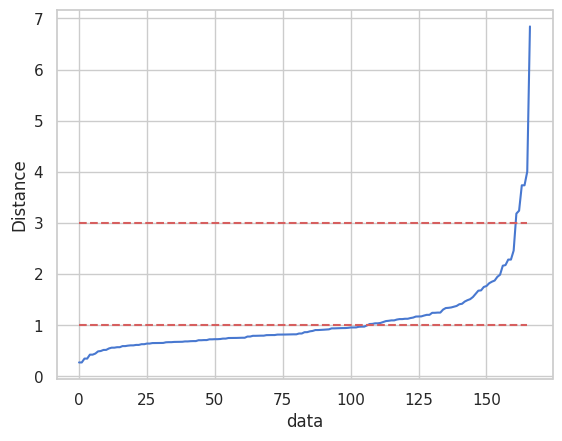

In [243]:
plt.plot(distances)

plt.xlabel('data')
plt.ylabel('Distance')

plt.hlines(y=3 ,xmin=0,xmax=165, linestyles="dashed", colors='r')
plt.hlines(y=1 ,xmin=0,xmax=165, linestyles="dashed", colors='r')

Al realizar el algoritmo de DBSCAN en el dataset sin aplicar PCA, observamos en nuestro gráfico de rodilla que los datos varían en un rango de 1 a 3. Esto indica que existe una posible variación en el número de clusters óptimos dentro de ese rango. Por lo tanto, debemos considerar diferentes valores de Eps y min_samples dentro de ese rango basado en el orden de las distancias.

In [244]:
# Crear un arreglo de valores de epsilon desde 0.5 hasta 2 con paso de 0.1
eps_values = np.arange(1, 3, 0.1)

# Crear un arreglo de valores de min_samples desde 3 hasta 12
min_samples = np.arange(3, 12)

In [245]:
from itertools import product

# Generar todas las combinaciones posibles entre los valores de eps_values y min_samples
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_scores = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_scaled)
    try:
        sil_scores.append(silhouette_score(df_scaled, y_dbscan))
    except:
        sil_scores.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [246]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps','Min_samples'])
df_params_tunning['sil_score'] = sil_scores
df_params_tunning['n_clusters'] = no_of_clusters

In [247]:
pivot_1 = pd.pivot_table(df_params_tunning, values='sil_score', columns='Eps', index='Min_samples')

pivot_2 = pd.pivot_table(df_params_tunning, values='n_clusters', columns='Eps', index='Min_samples')

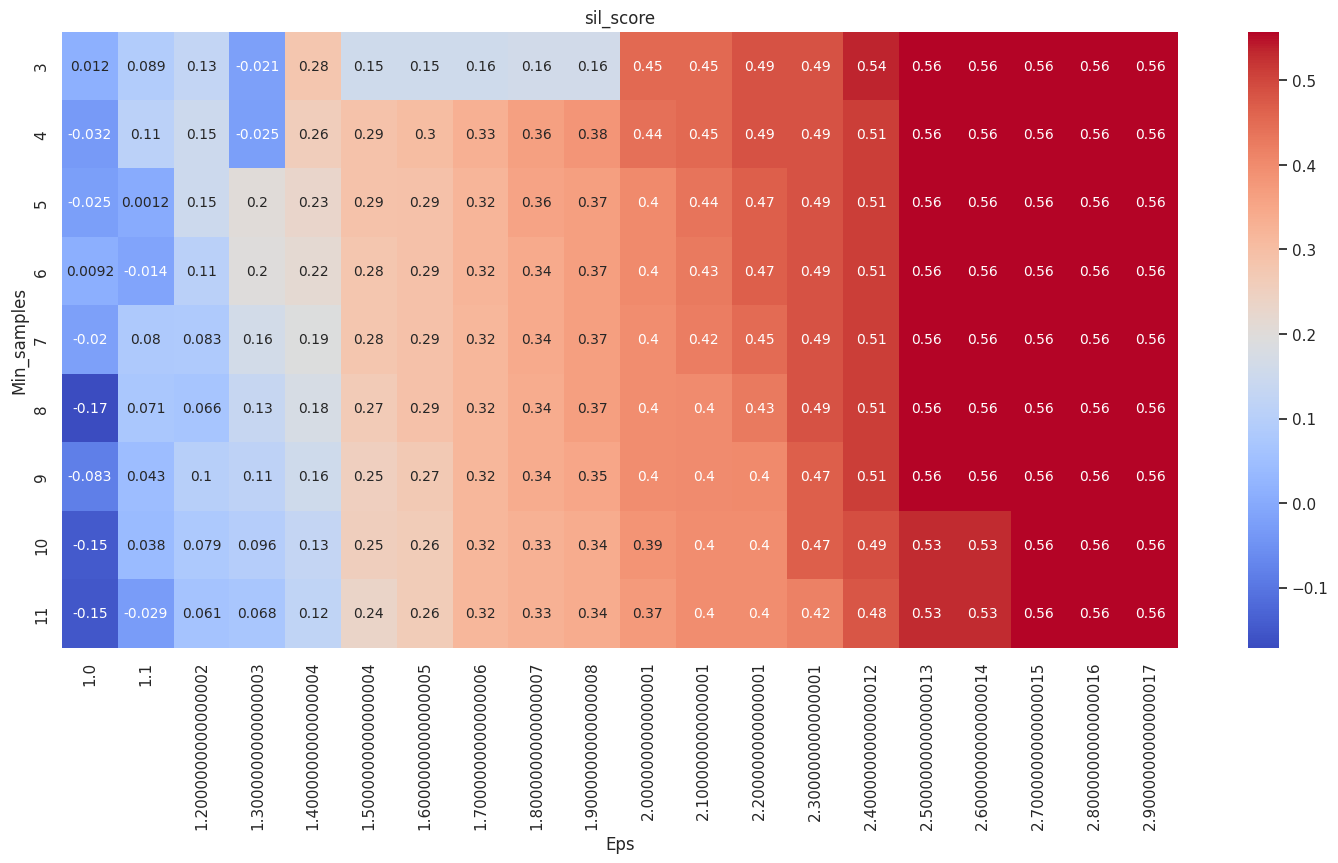

In [248]:
plt.figure(figsize=(18,8))
sns.heatmap(pivot_1,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('sil_score')
plt.show()

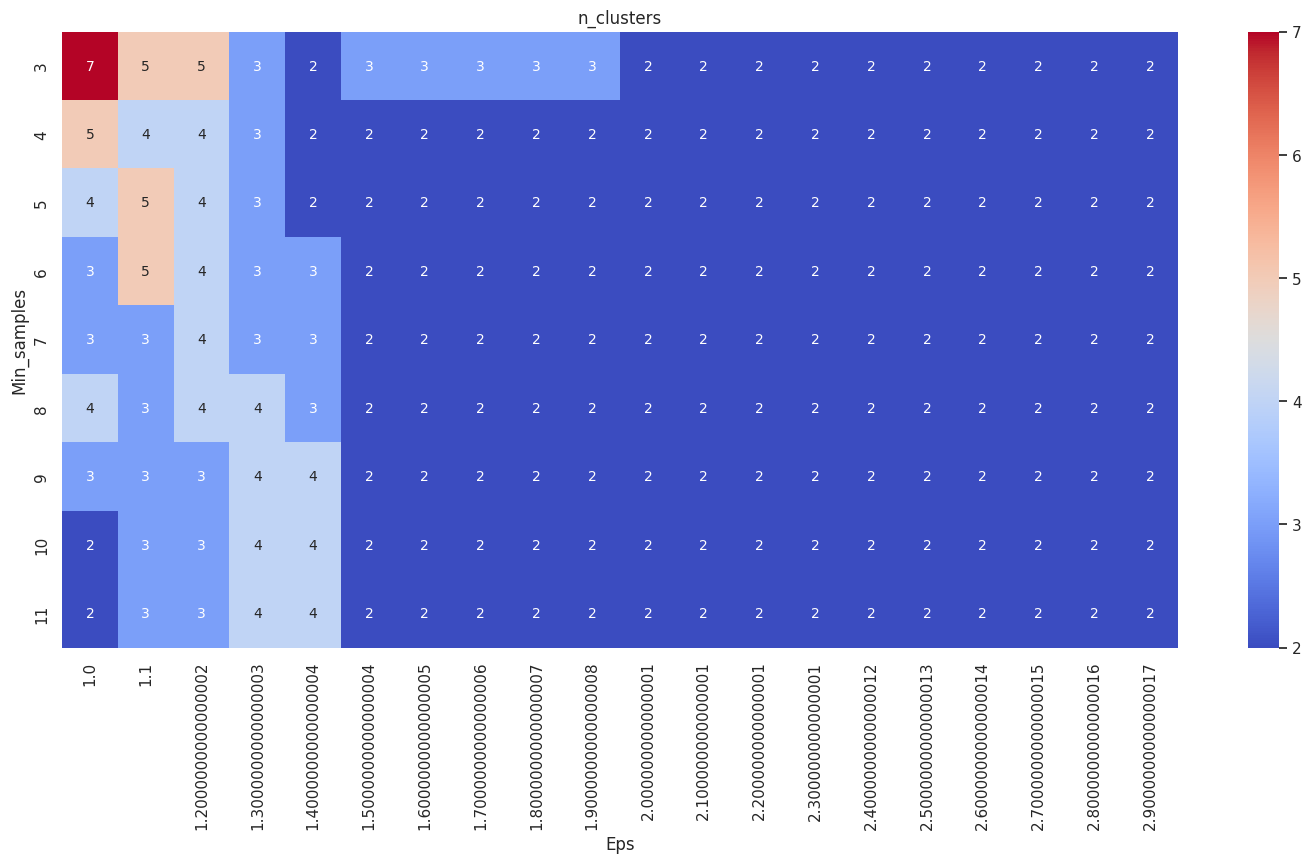

In [249]:
plt.figure(figsize=(18,8))
sns.heatmap(pivot_2,annot=True, annot_kws={'size':10}, cmap='coolwarm');
plt.title('n_clusters')
plt.show()

In [250]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_scaled)
print("Silhouette Score: ", silhouette_score(df_scaled, y_dbscan))
df['dbscan_cluster'] = y_dbscan

Silhouette Score:  0.1563549566374231


In [251]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means_PCA,K_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,2,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,2,1,0,0,0


## Evaluacion de resultados

In [253]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'K_means_PCA',
       'K_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

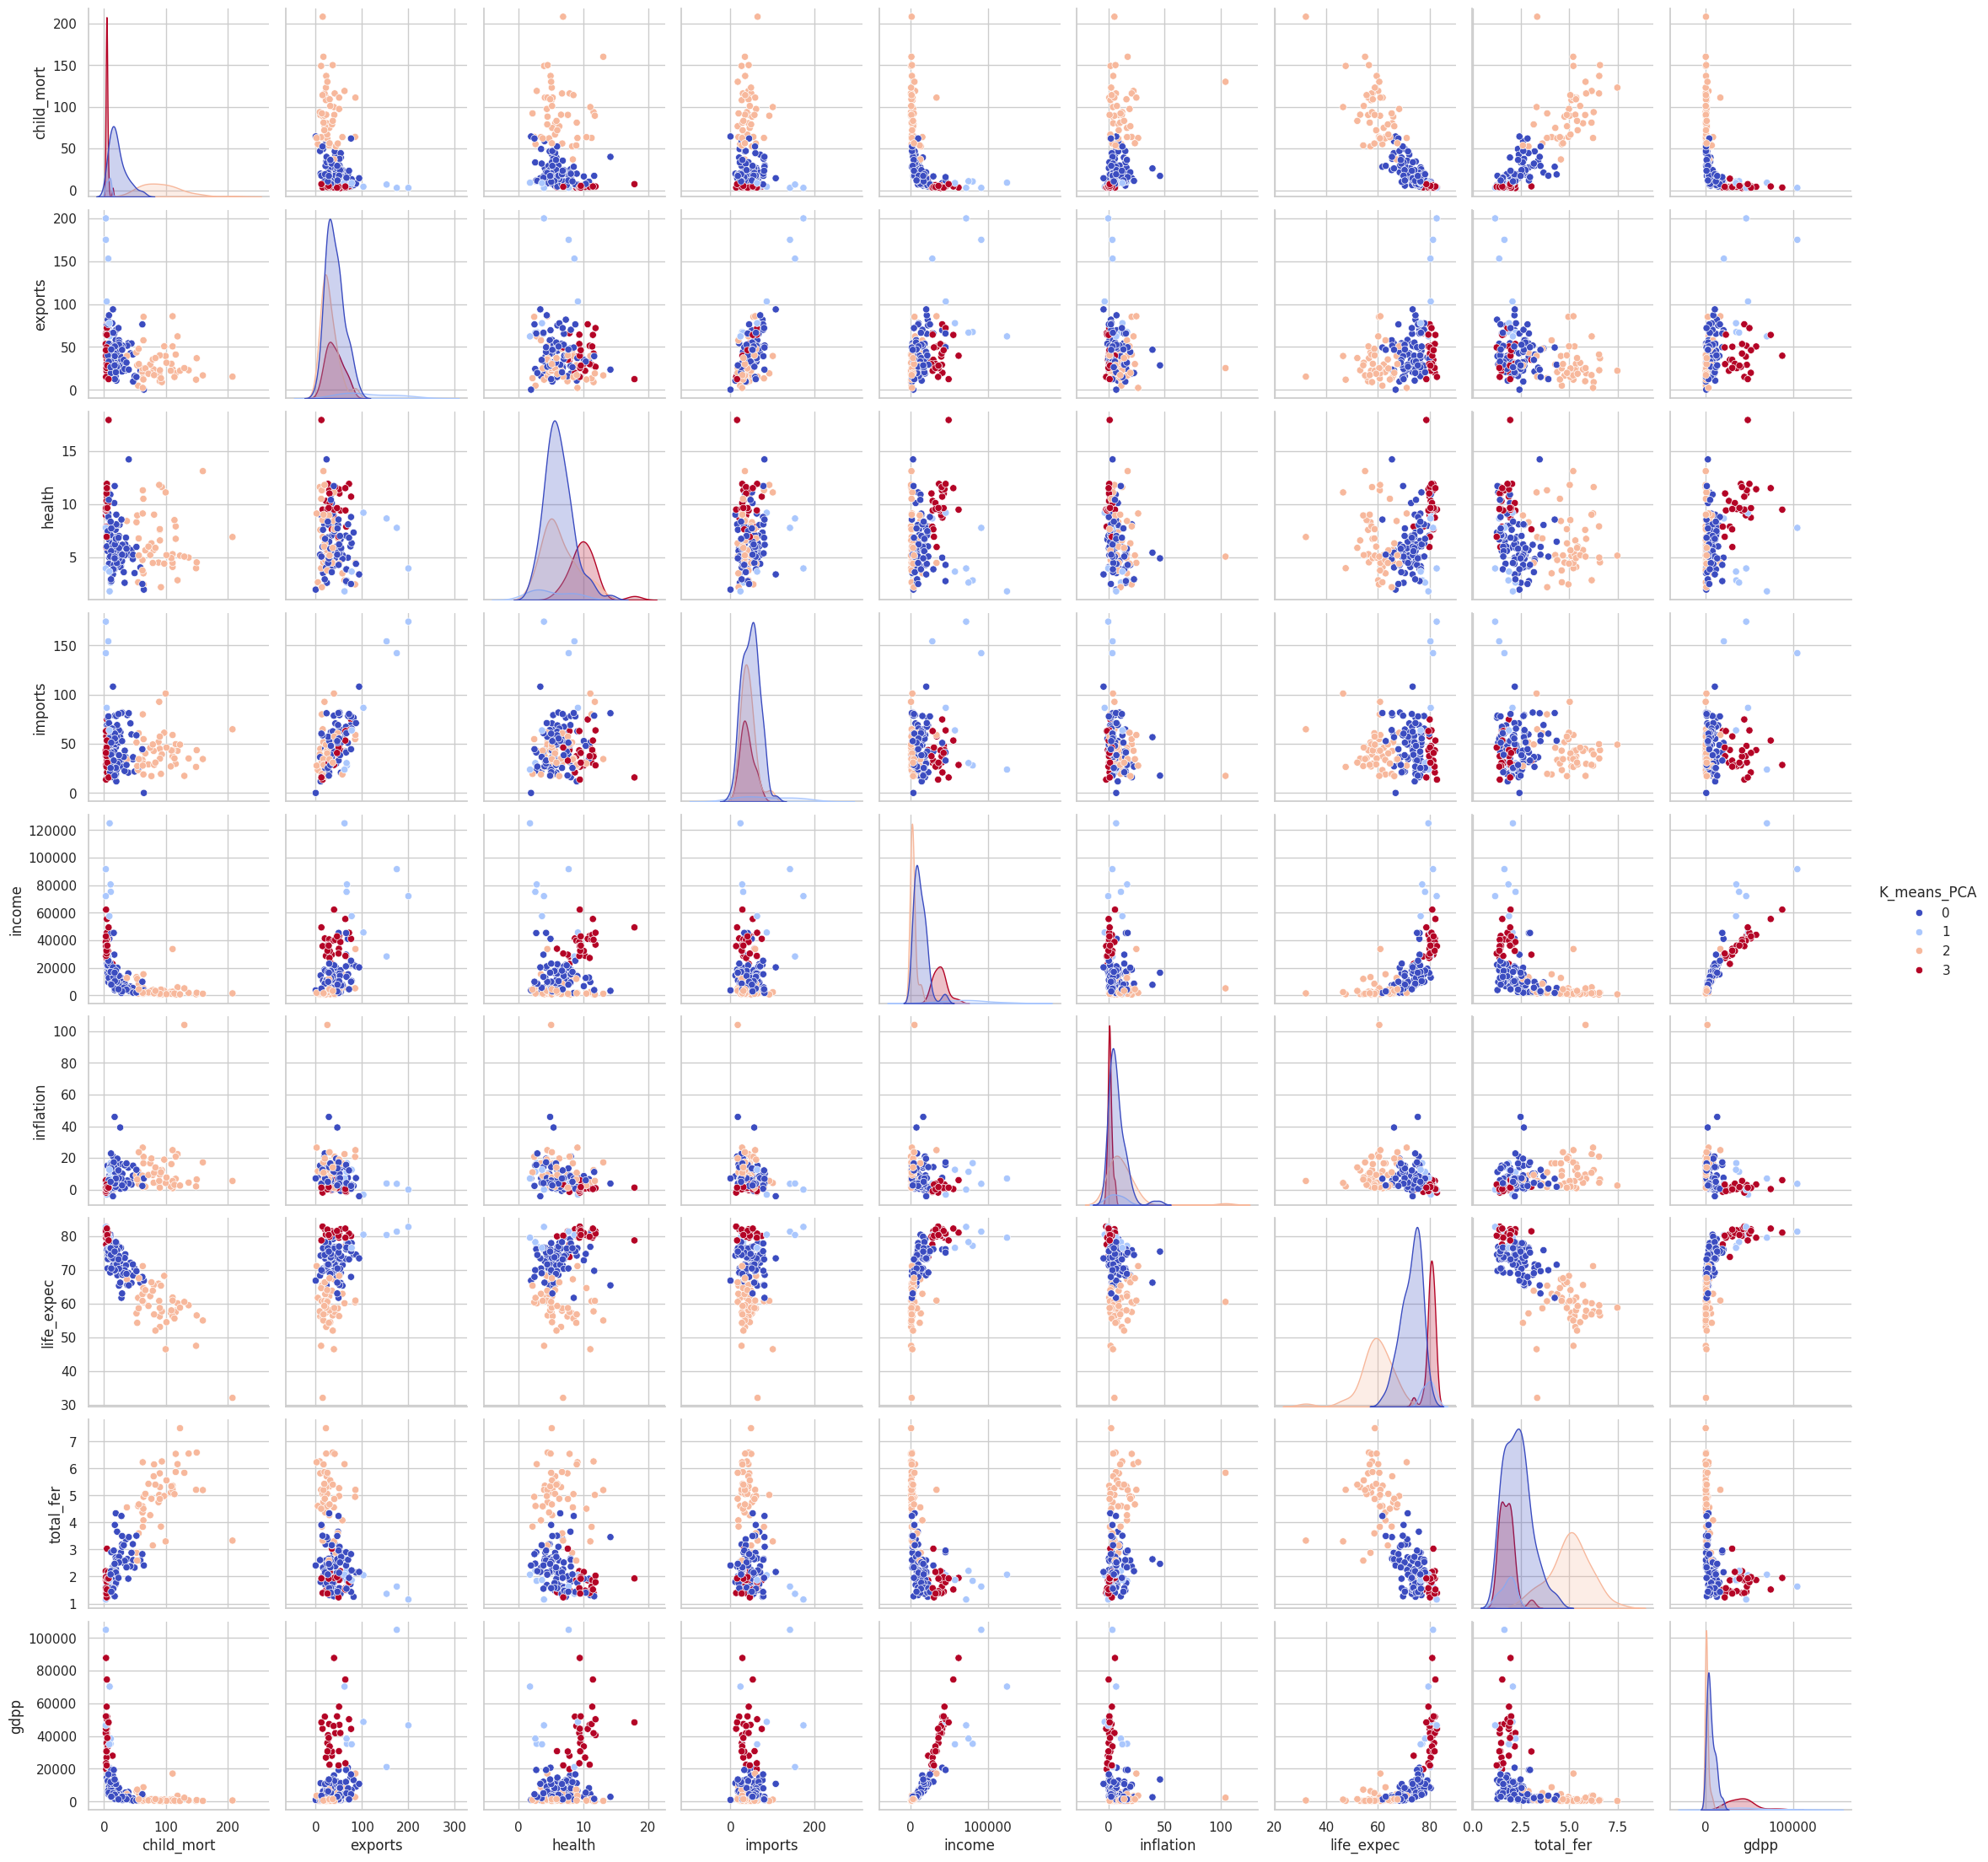

In [255]:
sns.pairplot(data=df[[
    'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp', 'K_means_PCA'
]], hue='K_means_PCA', palette='coolwarm')
plt.show()

Después de generar el pairplot, se observa que hay distribuciones donde están bien segmentadas en varios grupos. Sin embargo, para continuar nuestra investigación, nos enfocaremos en analizar las variables cruzadas de GDP per cápita (GDPP) y tasa de mortalidad infantil (Child Mortality).

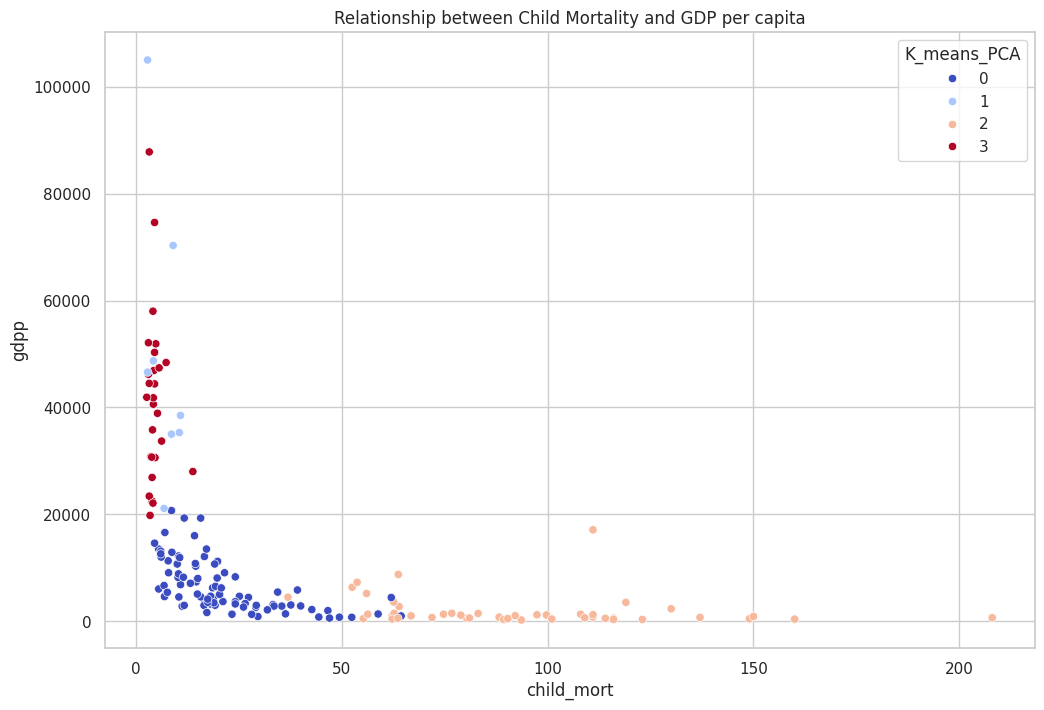

In [257]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='child_mort', y='gdpp', hue='K_means_PCA', palette='coolwarm')
plt.title('Relationship between Child Mortality and GDP per capita')
plt.show()

In [262]:
df[df['K_means_PCA'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_means_PCA,K_means,hc_pca,hc,dbscan_pca,dbscan_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3,1,0,1,0,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3,1,0,1,0,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,3,1,0,0,0,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,3,1,0,1,0,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3,1,0,1,0,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,3,1,0,0,0,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,3,1,0,0,0,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,3,1,0,1,0,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,3,1,0,1,0,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,3,1,0,1,0,0


- En nuestro dashboard, encontramos una gráfica de dispersión que representa la ubicación de los países en función de su tasa de mortalidad infantil (Child Mortality) y su Producto Interno Bruto per cápita (GDPP). Observamos que Haití se destaca como el país con la mayor mortalidad infantil y un GDPP muy bajo.

- En el gráfico de barras de nuestro dashboard, se muestran los 10 países con la mayor mortalidad infantil, teniendo a Haití con la tasa más alta. Es importante destacar que la mayoría de estos países se encuentran en África.

- En el gráfico del mapamundi en nuestro dashboard, se han segmentado los países según su necesidad de ayuda inmediata utilizando colores. Los países verdes no necesitan ayuda, los amarillos tienen una necesidad media y los rojos tienen una necesidad alta.